<div style="background:#E9FFF6; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFQ619 - Data Analytics for Strategic Decision Makers (2024)</div>

# IFQ619 :: C3 - Ethical considerations in data analytics (tutorial)

## Fairness in data analytics

> ***It is possible for analysis to be acurate without being fair.***

Consider a scenario where we are analysing data from a survey completed by employees from a company. The employees were asked to rank how fair they believe their workplace to be on a scale as follows:

1. Very unfair
2. Unfair
3. Mostly fair
4. Fair
5. Very fair

Our analysis will give feedback to the company management on how well the company is doing in being fair to it's workers.

In [2]:
import pandas as pd
import plotly.express as px

In [4]:
file_path = "data/"
file_name = "fair-workplace-survey.csv"
df = pd.read_csv(f"{file_path}{file_name}", index_col="id")
df

,FairWorkPlace,Role,Gender
id,,,
1,3,W,F
2,2,W,F
3,2,W,F
4,1,W,F
5,2,W,F
6,3,S,F
7,3,W,M
8,4,W,M
9,4,W,M


There are 20 responses to the survey. Let's see what the average rating is to give us an idea of the overall fairness...

In [5]:
# get the average rating
df["FairWorkPlace"].mean()

3.45

So this is looking good. The average rating is between 'Mostly fair' and 'Fair'.

### The average problem

Consider what the average would be if we had 10 'Very unfair' (1) responses, and 10 'Very fair' (5) responses.




$$\frac{(10\times 1) + (10\times 5)}{20} = 3$$

The result is 'Mostly fair' even though half of the people said 'Very unfair' and the other half 'Very fair'. Do you think that this is a *fair* interpretation?

However, this type of bipolar distribution is unusual. Let's check the shape of our actual data...

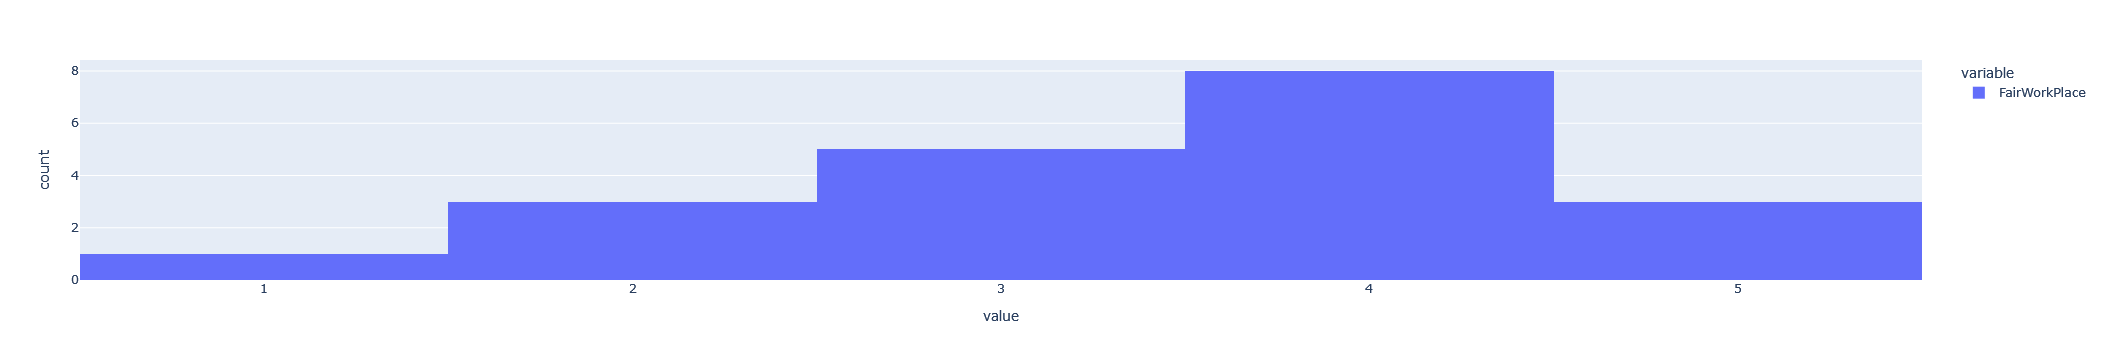

In [7]:
fig = px.histogram(df["FairWorkPlace"])
fig.show()

Even better. It looks like the highest rating was 4 which is very good news for the company.

### Digging deeper

However, if we consider the human factors behind the data, would the results be so positive?

Although the survey was anonymous, we have 2 other types of information available: the gender and role of the respondants. Our respondants indicated whether they are Male or Female and if they are a Worker or a Supervisor.

What's the average rating for a female worker?

In [10]:
femaleWorker = df.loc[df["Gender"] == "F"]
femaleWorker["FairWorkPlace"].mean(0)

2.1666666666666665

How does this compare with the average that we calculated above?

Let's get a better idea by segmenting the data and finding the averages of each segment...

In [ ]:
female = (df[???] == ???)
male = (df[???] == ???)
worker = (df[???] == ???)
supervisor = (df[???] == ???)

def averageRating(type1,type2):
    return df.loc[type1 & type2]['FairWorkPlace'].mean(0)

segments = {}
segments['FemaleWorker'] = averageRating(???,???)
segments['FemaleSupervisor'] = averageRating(???,???)
segments['MaleWorker'] = averageRating(???,???)
segments['MaleSupervisor'] = averageRating(???,???)
segments

This tells a different story than our first histogram. Let's visualise this data...

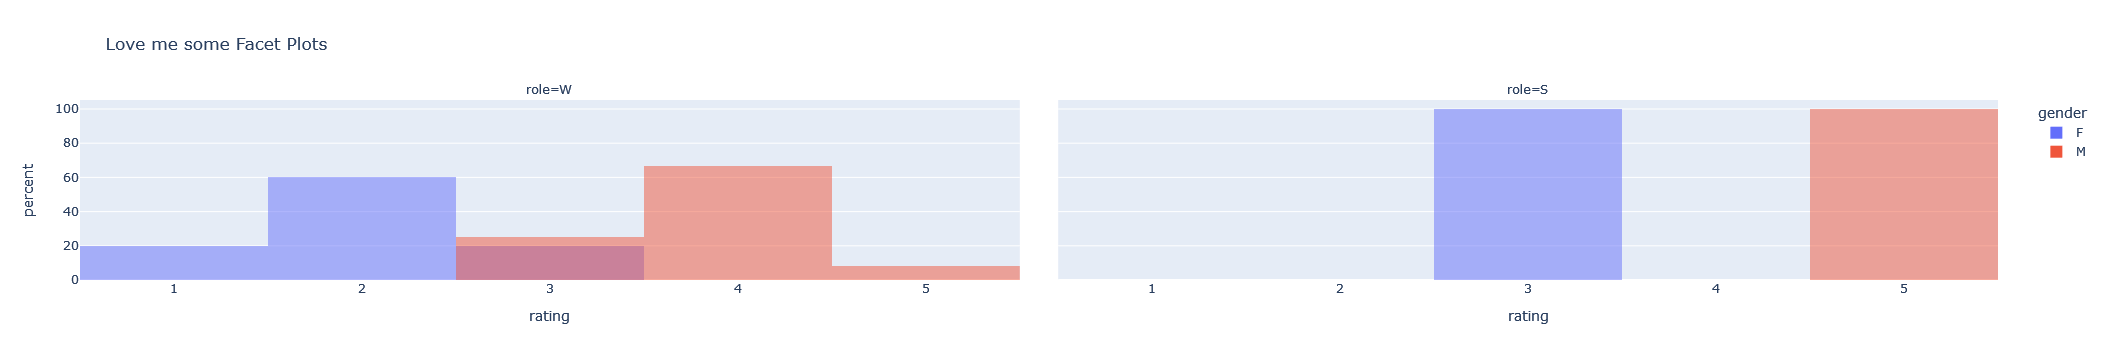

In [12]:
fig = px.histogram(df['FairWorkPlace'],color=df["Gender"], barmode="overlay",histnorm='percent',facet_col=df["Role"],
                   labels = {"value":"rating","color":"gender","facet_col":"role"},
                   title = "Love me some Facet Plots")
fig.show()

### What can we learn?

* What is the story of the segment visualisation?
* How does this different from the original story?
* Was the first analysis wrong?
* If we didn't dig deeper, how fair would our analysis be?
* What is the difference between accurate analysis and fair analysis?

### Anscombe's Quartet

[Anscombe, F.J. (1973) Graphs in Statistical Analysis](https://www.jstor.org/stable/2682899)

In [ ]:
# Load Anscombe's Quartet data
file_path = "data/"
file_name = ???
aq_df = pd.read_csv(f"{file_path}{file_name}",index_col=???)
aq_df

In [ ]:
aq_df.groupby('dataset').describe()

In [ ]:
fig = px.scatter(aq_df,x=???,y=???,facet_col=???,color=???,trendline='ols')
fig.update_layout(showlegend=False)
fig.show()

### A more complex example

Read through the following example which explains how similar biases can occur when working with more complicated machine learning algorithms:

[Google Developers - Text Embedding Models Contain Bias. Here's Why That Matters.](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html?m=1)